# Regression Assumptions & Logistic Regression Notebook

1. Outlier Detection and Removal
2. Multicollinearity 
3. Scaling 
4. Logistic Regression

### Import the libraries you need!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

from pathlib import Path
data_dir = Path('../input/images')

### Read the dataset

In [ ]:
df_1 = pd.read_csv("../input/heart-disease-uci/heart.csv")
df_1.head()

#### 1. Show the scatter plot between chol and target

In [ ]:
plt.scatter(df_1.chol,df_1.target)

In [ ]:
df_1.target.value_counts()

<h1>I. Outlier Removal</h1>

This section is adapted from Suraj RP's excellent notebook on various outlier detection techniques. Visit his full notebook here: https://www.kaggle.com/rpsuraj/outlier-detection-techniques-simplified

## Exploratory Data Analysis

### Painting a picture of the data!

#### 0. What columns do we have in this dataset?

In [ ]:
df_1.columns

#### 1. How many null values do we have in each column?

In [ ]:
df_1.isnull().sum()

#### 2. What is the distribution in each column?

In [ ]:
df_1.hist(figsize=(20,20))

#### 3. Check out the statistical summary of the dataframe.

In [ ]:
df_1.describe()

#### Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis.

#### 4. Plot a simple box plot to visualize the outliers.

In [ ]:
sns.boxplot(y=df_1[['chol']])

#### From the above box plot, we can surely observe that there are outliers in it!

## Back to Preprocessing...

#### 1. Find the value at the 25th percentile. 

In [ ]:
perc_25 = np.percentile(df_1.chol,25)
perc_25

#### 2. Find the value at the 75th percentile.

In [ ]:
perc_75 = np.percentile(df_1.chol,75)
perc_75

#### 3. Find the IQR. 

In [ ]:
IQR = perc_75 - perc_25
IQR

#### 4. Calculate the cut-off range.

In [ ]:
cutoff = IQR*1.5

#### 5. Calculate the upper bound value using the cut-off range and the 75th percentile value.

In [ ]:
upper = cutoff + perc_75
upper

#### 6. Calculate the lower bound value using the cut-off range and the 25th percentile value.

In [ ]:
lower = perc_25 - cutoff
lower

#### 7. What is the total number of outliers?

In [ ]:
outliers = df_1.query('chol > @upper or chol<@lower')
outliers

### Visual representation:

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=False)
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='red')

#### Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

### Remedial Measure:
#### 8. Remove the records which are above the upper bound value and records below the lower bound value!

In [ ]:
#Data Frame without outliers

#df_1 = df_1[df_1["chol"]>lower&&df_1["chol"]<upper]
df_new = df_1.query('chol <= @upper and chol >= @lower')
len(df_new)

# II. Multicollinearity 

### Back to Exploratory Data Analysis

#### 1. Find the correlation coefficients matrix.

In [ ]:
np.corrcoef(df_1,df_1)
#IGNOREscipy.stats.pearsonr(x, y)
#IGNOREscipy.stats.spearmanr(x, y)
#IGNOREscipy.stats.kendalltau(x, y)

#### 2. Plot the correlation matrix as a heatmap.

In [ ]:
#IGNOREplt.imshow(np.corrcoef(x,y), cmap='hot', interpolation='nearest')
#IGNOREplt.show()
sns.heatmap(np.corrcoef(df_1,df_1))

### How to deal with multicollinearity?

1. Using Principal Component Analysis to select the most important variables
2. Remove one of the columns that contribute to multicollinearity
3. Create interaction variables from the correlated variables

***1. What is multicollinearity?***                                                                                       
    **-** When two or more variables are closely related in a linear way, making their effects indistinguishable. Can be caused due to insufficient data or adding a variable in the regression that is a combination of two other variables or using a dummy variable incorrectly.

***2. How do you detect multicollinearity?***                                                                             
    **-** By adding meaningless noise to the data and check its effect on the coefficents.                                 
    **-** Variance Inflation Factor (VIF) which is equal to 1/(1-R^2) where a value above 5 or 10 proves multicollinearity problems. R^2 is the Coefficient of Determination which is a proportion of the variation in the dependent variable that is predictable from the independent variable(s).                                                                             
    **-** When a predictor is added or deleted,the estimate of the unknown population parameters and describe the relationship between a predictor variable and the response (Regression Coefficent) changes drasticly.                     
    **-** Insignificant regression coefficients for the affected variables in the multiple regression.                     
    **-** If you have a large enough sample, split the sample in half and run the model separately on each half. Wildly different coefficients in the two models could be a sign of multicollinearity.

***3. How does multicollinearity’s presence ruin regression models? Explain. Include references.***                       
    **-** Small changes to the input data can lead to large changes in the model, even resulting in changes of sign of parameter estimates. (Wikipedia)                                                                                               **-**  reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant. (https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)                                         
    
***4. How can you remedy multicollinearity? Choose one technique.***                                                       
    **-** Removing variables

***5. Explain the technique you chose with pictures.***                                                                   
    **-** Get the VIF values of all the variables and remove the element with the highest VIF value and check again. If multicollinearity still exists, remove the next highest VIF value element and so on.                                        
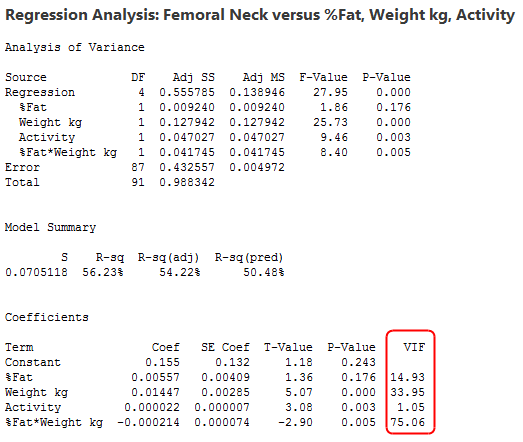                                                                                                                                                                    
***6. What is the difference between normalization and standardization?***                                                 
    **-** Normalization (Min-Max scaling) is rescaling data into range from 0 to 1 inclusive. Standardization is rescaling the data to have a mean of 0 and a standard deviation equal to 1. Normalization can be used when you know that the distribution of your data does not follow a Gaussian distribution, while Standardization is used where the data follows a Gaussian distribution and Standardization does not affect outliers

***7. Why do we need to scale our data for regression?***                                                                 
    **-** To avoid unstable and slow model due to large weight values. To avoid a large spread of values which can cause a large error gradient.

# III. Scaling

#### 1. Display the minimum and maximum of each column.

In [ ]:
m=df_1.min()
n=df_1.max()
print(m)
print("-----------")
print(n)

#### 2 Find the max of 'chol'

In [ ]:
df_1["chol"].max()

#### 3. Find the min of 'chol'

In [ ]:
df_1["chol"].min()

#### 4. Perform min-max scaling on 'chol'

In [ ]:

Xsc = (df_1["chol"] - df_1["chol"].min())/(df_1["chol"].max() - df_1["chol"].min())
#Xsc
Xsc.head()

#### 5. Find the mean of 'age'

In [ ]:
df_1["age"].mean()

#### 6. Find the standard deviation of 'age'

In [ ]:
ASD = np.std(df_1["age"])
ASD

#### 7. Verify the mean and standard deviation by showing the distribution of 'age.'

In [ ]:
sns.distplot(df_1.age, kde=False)

#### 8. Perform Z-standardization on 'age.'

In [ ]:
AZs = (df_1["age"] - df_1["age"].mean())/np.std(df_1["age"])
#AZs
AZs.head()

# IV. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
import scipy

#### 1. Create a logistic regression model

In [ ]:
model = LogisticRegression(random_state = 0)

#### 2. Set X to be the cholestrol column and Y to be the target column.

In [ ]:
x = df_1.chol
y = df_1.target

#### 3. Perform train-test-splot by 20%

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=0)

#### 4. Fit the model to the train data.

In [ ]:
model.fit(x_train.to_frame(),y_train)

In [ ]:
print(model.intercept_, model.coef_)

In [ ]:
def plot_log_reg(x, y, data, clf, xmin=None, xmax=None, alpha=1, ax=None):
    plt.rcParams["figure.figsize"] = [10,10]
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.scatter(data[x], data[y], color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax, 300)

    loss = scipy.special.expit(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    fig.tight_layout()
    sns.despine()
    return fig, ax

In [ ]:
plot_log_reg('chol', 'target', df_1[['chol','target']], clf = model, xmin = 100, xmax = 350);


# 